In [2]:
import numpy as np
import pandas as pd
from pca import pca
from os.path import join
import matplotlib.pyplot as plt

In [3]:
fold_data = pd.read_csv(join('..', 'Data', 'fold.csv'), index_col=0, header=0)
w_inf = fold_data.shape[0]
print('ori pep', fold_data.shape[0]) # peptidos iniciales
fold_data.replace(np.inf, np.nan, inplace=True) # inf -> nan
fold_data.dropna(inplace=True) # drop nans
print('non inf pep', fold_data.shape[0]) # peptidos sin inf
print('dif', w_inf - fold_data.shape[0]) # diferencia
fold_data = fold_data.T
fold_data = fold_data.apply(lambda x: np.log2(x + 1))  # log (1 + x)


metadata = pd.read_csv(join('..', 'Data', 'metadata.csv'), header=0)
metadata['sample_id'] = metadata['sample_id'].apply(lambda x: str(x).replace('.','-'))
samples_id = metadata['sample_id']
is_in = fold_data.index.isin(samples_id)
indexes_good = fold_data.index[is_in]
fold_data = fold_data.loc[indexes_good, :]

fold_data.to_csv(join('..', 'Data', 'fold_log.csv'))

ori pep 13106
non inf pep 12991
dif 115


In [50]:
metadata

,record_id,type_person,sex,age,diagnosis,duration,appendectomy,smoking,control,disease
sample_id,,,,,,,,,,
R33P01_01_N003_IBD-Chile_A_T_C2,N003,Control,Male,57,Control,0.564123,No,Never,1,0
R33P01_02_N006_IBD-Chile_A_T_C2,N006,Control,Female,26,Control,0.369503,No,Never,1,0
R33P01_03_N008_IBD-Chile_A_T_C2,N008,Control,Female,20,Control,0.317483,Yes,Never,1,0
R33P01_04_N011_IBD-Chile_A_T_C2,N011,Control,Male,30,Control,0.372241,No,Never,1,0
R33P01_05_N013_IBD-Chile_A_T_C2,N013,Control,Female,22,Control,0.325697,No,Never,1,0
...,...,...,...,...,...,...,...,...,...,...
R33P01_76_N082_IBD-Chile_A_T_C2,N082,Disease,Female,37,CD,0.082137,No,Ex_smoker,0,1
R33P01_77_N085_IBD-Chile_A_T_C2,N085,Disease,Female,30,CD,1.431811,Yes,Never,0,1
R33P01_78_N091_IBD-Chile_A_T_C2,N091,Disease,Female,20,UC,2.321745,No,Never,0,1


[22-07-2025 22:54:42] [pca.pca] [INFO] Column labels are auto-completed.
[22-07-2025 22:54:42] [pca.pca] [INFO] Row labels are auto-completed.
[22-07-2025 22:54:42] [pca.pca] [INFO] Normalizing input data per feature (zero mean and unit variance)..
[22-07-2025 22:54:42] [pca.pca] [INFO] PCA reduction performed to capture 95.0% explained variance using 12991 columns of the input data.
[22-07-2025 22:54:42] [pca.pca] [INFO] Fit using PCA.
[22-07-2025 22:54:42] [pca.pca] [INFO] Compute loadings and PCs.
[22-07-2025 22:54:42] [pca.pca] [INFO] Compute explained variance.
[22-07-2025 22:54:42] [pca.pca] [INFO] Number of components is 66 that covers 95.00% explained variance.
[22-07-2025 22:54:42] [pca.pca] [INFO] The PCA reduction is performed on the 12991 columns of the input dataframe.
[22-07-2025 22:54:42] [pca.pca] [INFO] Fit using PCA.
[22-07-2025 22:54:43] [pca.pca] [INFO] Compute loadings and PCs.
[22-07-2025 22:54:43] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with al

Text(0.5, 1.0, 'PCA Explained Variance Ratio - 95% with 66 components')

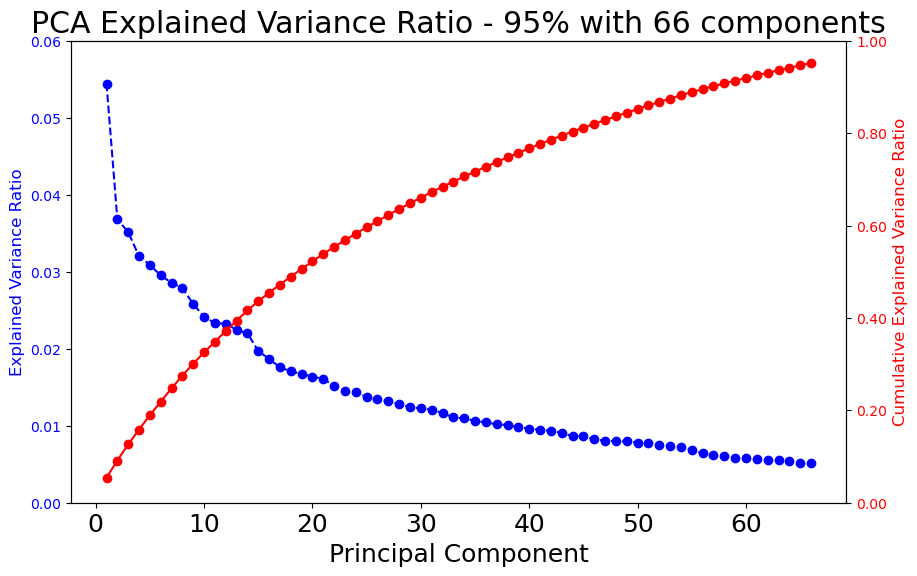

In [13]:
from sklearn.preprocessing import StandardScaler
# pca 

# model
scaler = StandardScaler()
fold_data_scaled = scaler.fit_transform(fold_data)
# pca
pca_fold = pca(n_components=0.95, normalize=True, detect_outliers=['ht2', 'spe'])
fold_data_pca = pca_fold.fit_transform(fold_data_scaled)
n_comp = pca_fold.results['PC'].shape[1]
exp_rat = pca_fold.results['variance_ratio'][:n_comp]
cum_rat = np.cumsum(exp_rat)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(exp_rat) + 1), exp_rat, marker='o', linestyle='--', color='b', label='Explained Variance Ratio')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio', fontsize=12, color = 'b')
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], fontsize=10, color='b')

ax2 = ax.twinx()
ax2.plot(range(1, len(cum_rat) + 1), cum_rat, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance Ratio')
ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12, color='r')
ax2.set_yticks(ax2.get_yticks())
ax2.set_yticklabels([f'{tick:.2f}' for tick in ax2.get_yticks()], fontsize=10, color='r')
ax.set_title(f'PCA Explained Variance Ratio - 95% with {len(exp_rat)} components')

[scatterd] >INFO> Create scatterplot
[22-07-2025 22:55:27] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '66 Principal Components explain [95.64%] of the variance'}, xlabel='PC1 (5.44% expl.var)', ylabel='PC2 (3.68% expl.var)'>)

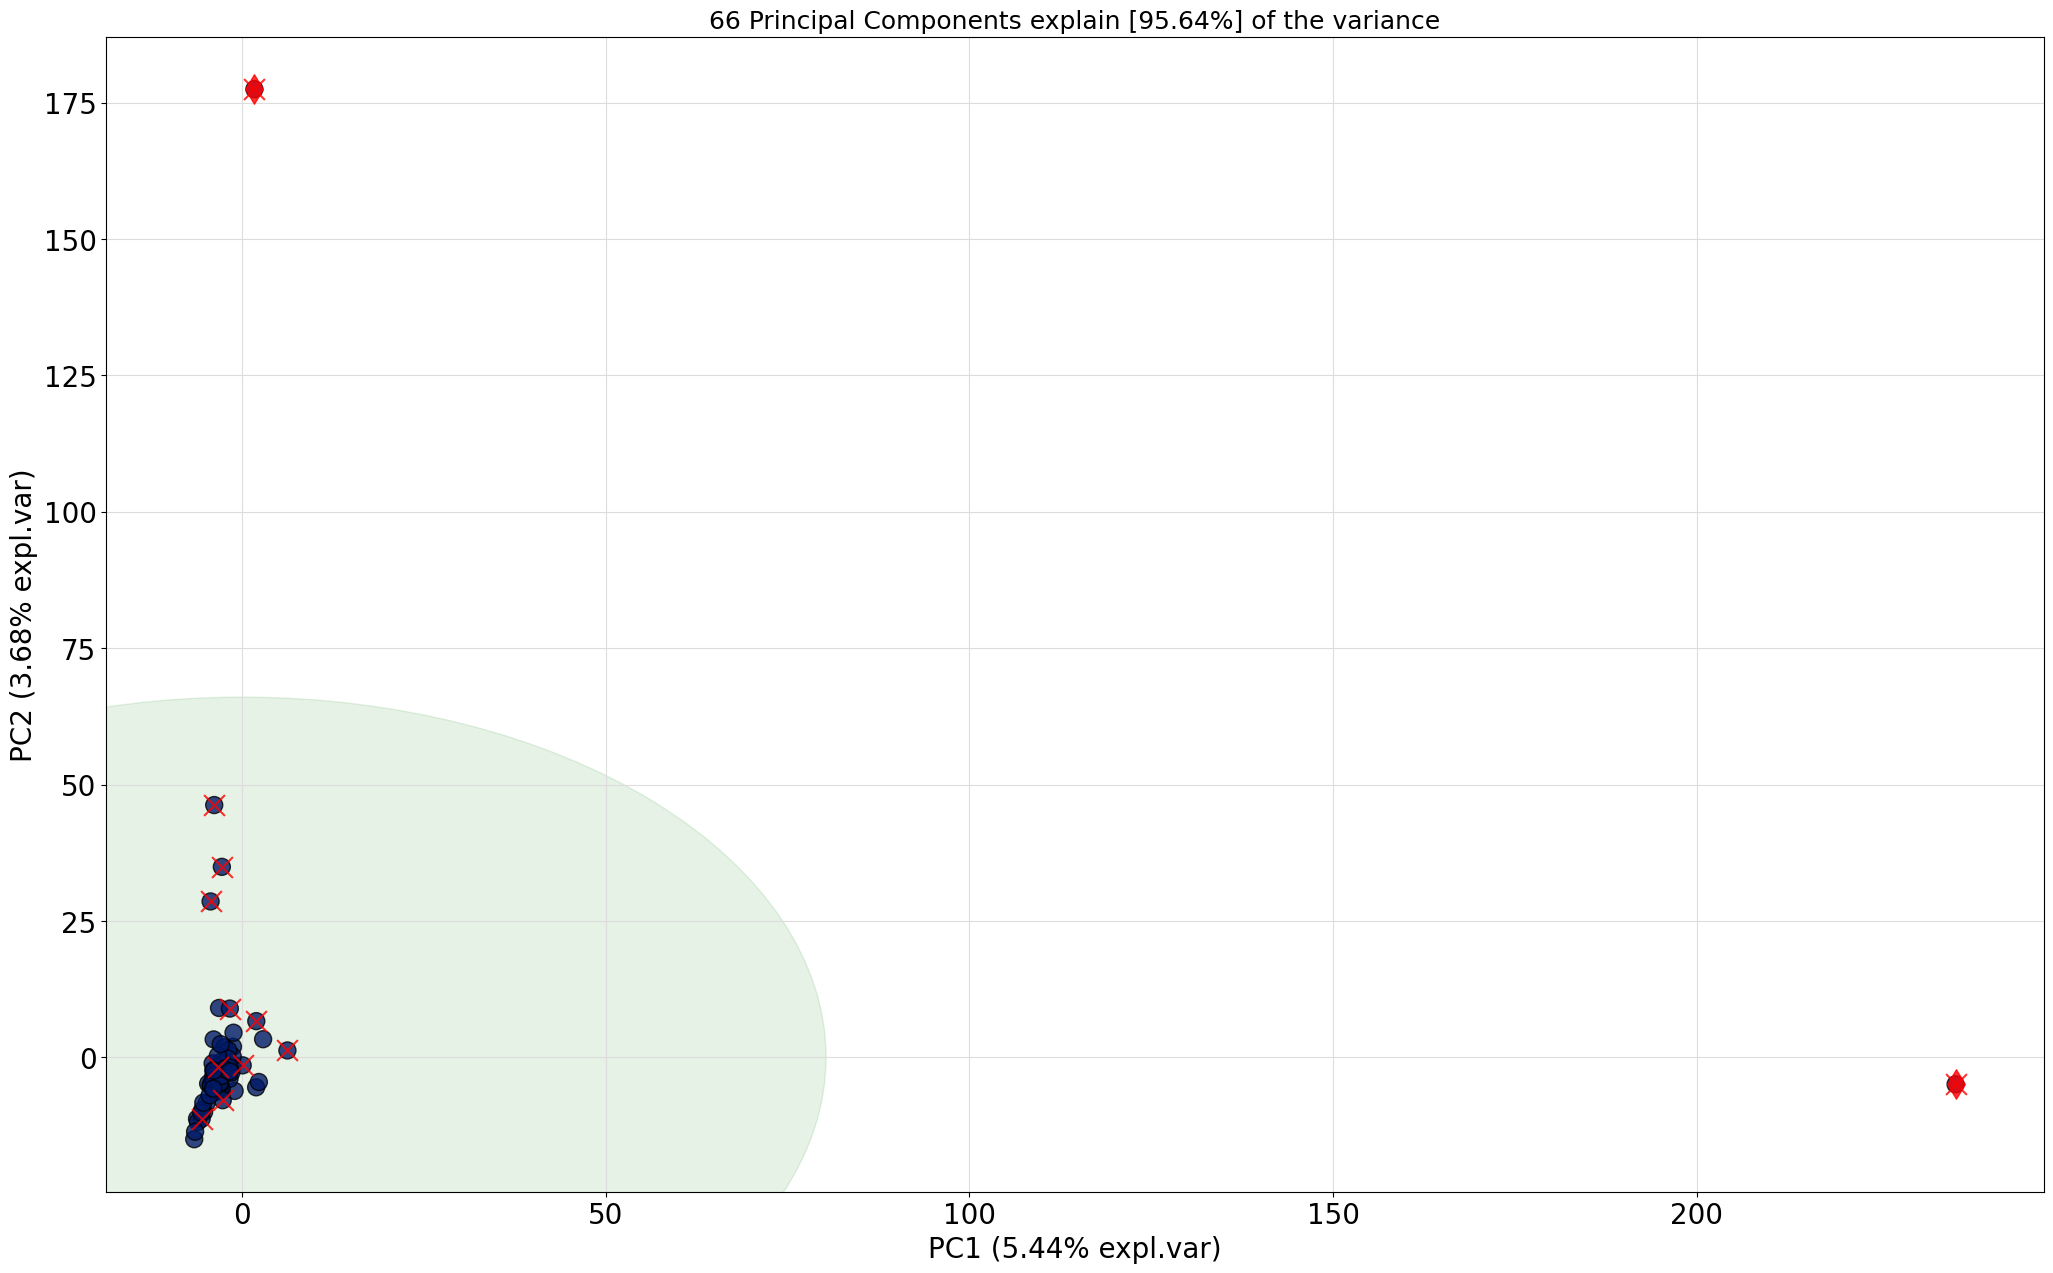

In [ ]:
pca_fold.scatter(legend=True, SPE=True, HT2=True)

In [32]:
outliers = pca_fold.results['outliers']['y_bool_spe']
outlier_data = fold_data.index[outliers]
pationes = metadata[metadata['sample_id'].isin(outlier_data)]
pationes

,sample_id,record_id,type_person,sex,age,diagnosis,duration,appendectomy,smoking,control,disease
56,R33P01_57_N047_IBD-Chile_A_T_C2,N047,Disease,Female,63,CD,9.580051,No,Current_smoker,0,1
73,R33P01_74_N080_IBD-Chile_A_T_C2,N080,Disease,Female,29,CD,2.863851,No,Current_smoker,0,1


In [42]:
metadata

,sample_id,record_id,type_person,sex,age,diagnosis,duration,appendectomy,smoking,control,disease
0,R33P01_01_N003_IBD-Chile_A_T_C2,N003,Control,Male,57,Control,0.564123,No,Never,1,0
1,R33P01_02_N006_IBD-Chile_A_T_C2,N006,Control,Female,26,Control,0.369503,No,Never,1,0
2,R33P01_03_N008_IBD-Chile_A_T_C2,N008,Control,Female,20,Control,0.317483,Yes,Never,1,0
3,R33P01_04_N011_IBD-Chile_A_T_C2,N011,Control,Male,30,Control,0.372241,No,Never,1,0
4,R33P01_05_N013_IBD-Chile_A_T_C2,N013,Control,Female,22,Control,0.325697,No,Never,1,0
...,...,...,...,...,...,...,...,...,...,...,...
75,R33P01_76_N082_IBD-Chile_A_T_C2,N082,Disease,Female,37,CD,0.082137,No,Ex_smoker,0,1
76,R33P01_77_N085_IBD-Chile_A_T_C2,N085,Disease,Female,30,CD,1.431811,Yes,Never,0,1
77,R33P01_78_N091_IBD-Chile_A_T_C2,N091,Disease,Female,20,UC,2.321745,No,Never,0,1
78,R33P01_79_N092_IBD-Chile_A_T_C2,N092,Disease,Female,22,UC,0.076661,No,Current_smoker,0,1


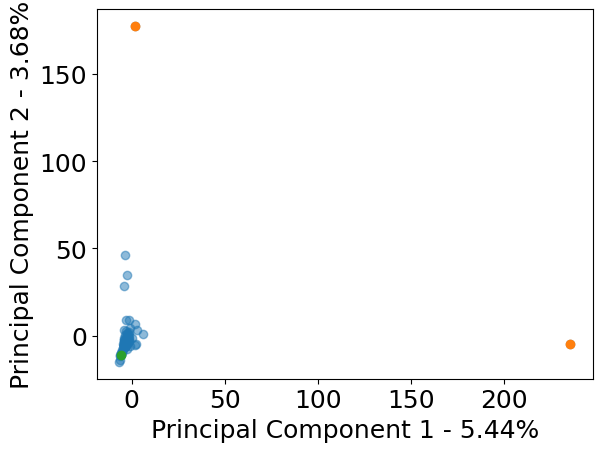

In [41]:
pca_data = pca_fold.results['PC'][['PC1', 'PC2']]
plt.scatter(pca_data['PC1'], pca_data['PC2'], alpha=0.5)
plt.xlabel(f'Principal Component 1 - {exp_rat[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 - {exp_rat[1]*100:.2f}%')

plt.scatter(pca_data.loc[outliers, 'PC1'], pca_data.loc[outliers, 'PC2'], alpha=1)
plt.scatter(pca_data.loc[46, 'PC1'], pca_data.loc[46, 'PC2'], alpha=1)

In [35]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66
0,-1.280505,-1.407742,-0.150005,-0.680148,-1.241702,-2.525906,-0.304078,0.079366,0.964880,0.190674,...,-9.406440,4.498522,1.030934,-2.669842,0.493570,1.295065,1.056530,-2.373129,1.524404,0.723912
1,-3.337615,-3.395072,-0.650325,-2.190311,1.221606,-1.727275,-0.142766,-1.183184,0.591134,-1.649856,...,48.531729,31.521363,-35.105777,-22.942391,5.133781,5.878282,20.246240,-7.481468,-9.285395,0.354092
2,-4.225733,-5.302979,-1.693845,-6.028908,-2.660426,-4.577668,-3.072283,-2.407453,-4.485715,-3.600869,...,-42.905520,47.419536,0.910467,-12.840846,-15.835571,-2.894467,4.395525,5.529957,-6.370651,3.454595
3,-1.281886,1.925613,-1.819520,3.744014,-0.407120,-4.226235,-0.025254,-3.817801,9.469460,-0.329853,...,0.530738,0.832093,0.973880,0.912417,-0.187677,-0.886545,1.043488,0.208939,0.159344,0.493869
4,-3.982079,-2.354445,-2.022910,-4.198030,-0.638290,-3.956463,-1.823492,-1.260926,-0.521599,-3.538313,...,2.541159,-10.033675,3.893828,-10.418672,-7.656451,-6.859058,-3.164893,4.553694,-0.398723,3.994001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-6.490789,-13.654577,-5.805017,-11.965580,-7.076673,-11.351065,-7.888070,-4.873243,-15.607096,-14.509592,...,0.194040,2.805437,4.395996,-6.426704,0.050430,-4.895763,-8.454331,-3.448918,1.206709,0.652828
76,6.206034,1.244172,-7.589889,19.329603,15.027822,147.015239,-83.352190,-4.156771,-1.514748,1.466152,...,-0.202207,-0.197669,0.158331,-0.156172,0.337587,-0.334667,0.736363,-0.244873,-0.603300,0.317262
77,-3.907525,-2.444456,-1.958689,-4.426314,-2.443681,-4.755495,-1.776041,-3.056268,-2.026842,-3.627084,...,-4.239443,9.356283,-12.127905,32.414459,50.902688,-30.563903,-11.257941,-7.021940,-19.245231,-2.039115
78,-1.502600,-2.829720,-0.584044,-1.960940,0.535648,0.236949,-0.964676,0.894828,-0.372865,-1.206214,...,23.407146,9.169237,-7.567871,22.982275,-22.159908,-3.161497,-38.335868,45.582009,4.219232,4.088645


In [ ]:
# pcas_out = pcas.copy()
# pcas_out.index = fold_data.index
# pcas_out.to_csv(join('..', 'Data', 'PCA_95_logfold.csv'))

# clusters?

In [43]:
metadata.dropna(inplace=True)

metadata.set_index('sample_id', inplace=True)

/opt/homebrew/Caskroom/miniconda/base/envs/SaaLab/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


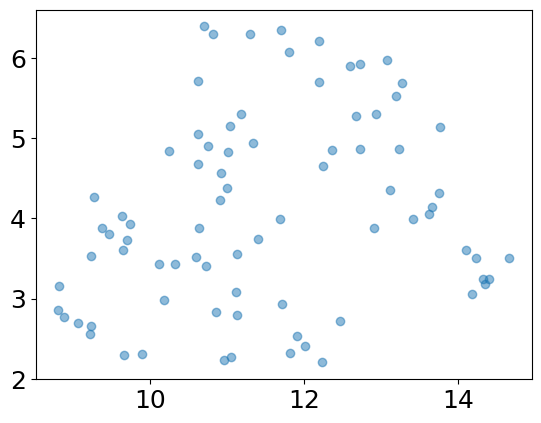

In [62]:
from umap import UMAP
from sklearn.preprocessing import scale
umap_model = UMAP(n_components=2, random_state=42, n_neighbors=3, min_dist=0.1, metric='euclidean')
umap_fold = umap_model.fit_transform((fold_data))
scatter = plt.scatter(umap_fold[:, 0], umap_fold[:, 1], alpha=0.5)

umap_fold = pd.DataFrame(umap_fold, index=fold_data.index, columns=['UMAP1', 'UMAP2'])


In [63]:
data_umap = pd.concat([umap_fold, metadata], axis = 1)


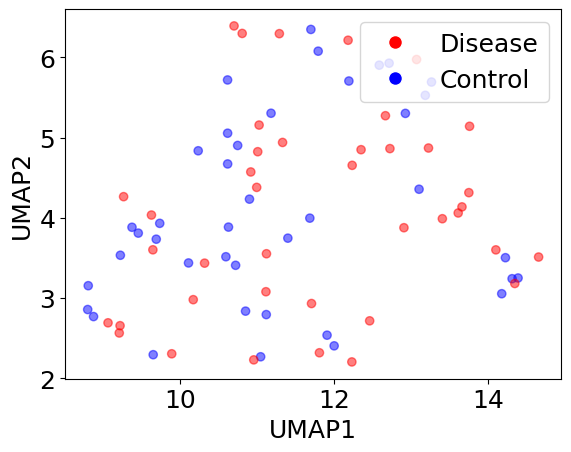

In [67]:
mapa = {
    'Disease': 'red',
    'Control': 'blue'
}
plt.scatter(data_umap['UMAP1'], data_umap['UMAP2'], c=data_umap['type_person'].map(mapa) , alpha=0.5)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Disease', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Control', markerfacecolor='blue', markersize=10)],
                    loc='upper right')

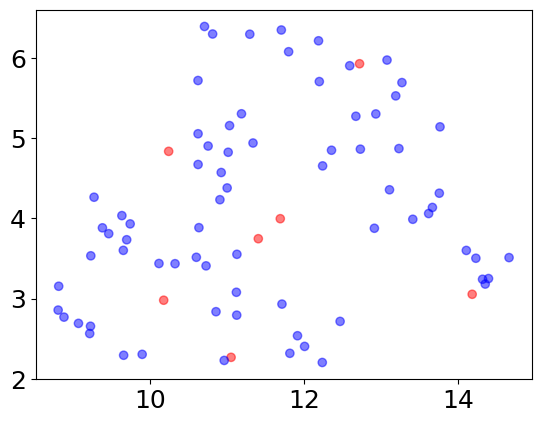

In [ ]:
mapa = {
    'Yes': 'red',
    'No': 'blue'
}
plt.scatter(data_umap['UMAP1'], data_umap['UMAP2'], c=data_umap['appendectomy'].map(mapa) , alpha=0.5)


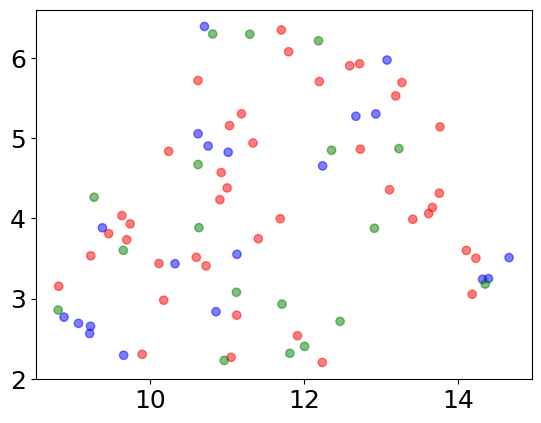

In [69]:
mapa = {
    'Never': 'red',
    'Current_smoker': 'blue',
    'Ex_smoker': 'green',
}
plt.scatter(data_umap['UMAP1'], data_umap['UMAP2'], c=data_umap['smoking'].map(mapa) , alpha=0.5)

Text(0, 0.5, 'UMAP2')

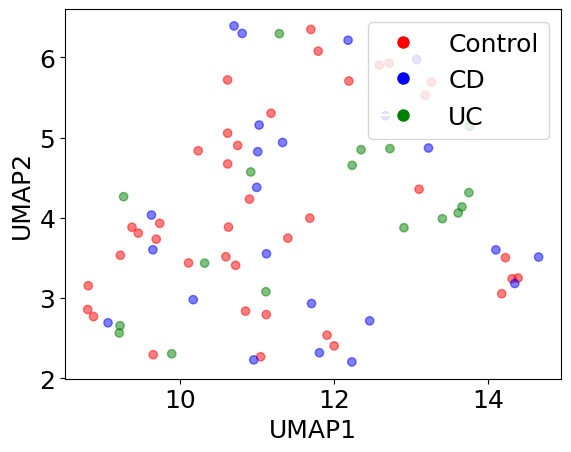

In [71]:
mapa = {
    'Control': 'red',
    'CD': 'blue',
    'UC': 'green',
}
plt.scatter(data_umap['UMAP1'], data_umap['UMAP2'], c=data_umap['diagnosis'].map(mapa) , alpha=0.5)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Control', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='CD', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='UC', markerfacecolor='green', markersize=10)],
                    loc='upper right')  
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

In [46]:
data_umap

,UMAP1,UMAP2,sex,age,cohort,diagnosis,appendectomy,smoking
R33P01_01_N003_IBD-Chile_A_T_C2,3.487713,8.112223,Male,57.0,Control,Control,No,Never
R33P01_02_N006_IBD-Chile_A_T_C2,3.993858,6.165272,Female,26.0,Control,Control,No,Never
R33P01_03_N008_IBD-Chile_A_T_C2,6.031166,8.065267,Female,20.0,Control,Control,Yes,Never
R33P01_04_N011_IBD-Chile_A_T_C2,4.166539,10.074331,Male,30.0,Control,Control,No,Never
R33P01_05_N013_IBD-Chile_A_T_C2,5.434473,7.631464,Female,22.0,Control,Control,No,Never
...,...,...,...,...,...,...,...,...
R33P01_76_N082_IBD-Chile_A_T_C2,5.958044,7.295087,Female,37.0,Disease,CD,No,Ex_smoker
R33P01_77_N085_IBD-Chile_A_T_C2,2.391420,6.993693,Female,30.0,Disease,CD,Yes,Never
R33P01_78_N091_IBD-Chile_A_T_C2,5.076382,10.126076,Female,20.0,Disease,UC,No,Never
R33P01_79_N092_IBD-Chile_A_T_C2,2.155483,6.062451,Female,22.0,Disease,UC,No,Current_smoker
